In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_true is one-hot encoded
# If your y_test is categorical (integers), convert to one-hot:
# y_true_bin = to_categorical(y_test, num_classes)
y_true_bin = y_test   # already one-hot encoded
y_pred_prob = model_lstm.predict(X_test)   # probabilities

n_classes = y_true_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

# Compute average AUC (macro/micro)
auc_macro = roc_auc_score(y_true_bin, y_pred_prob, multi_class='ovr', average='macro')
auc_micro = roc_auc_score(y_true_bin, y_pred_prob, multi_class='ovr', average='micro')

print(f"Macro-average AUC: {auc_macro:.4f}")
print(f"Micro-average AUC: {auc_micro:.4f}")


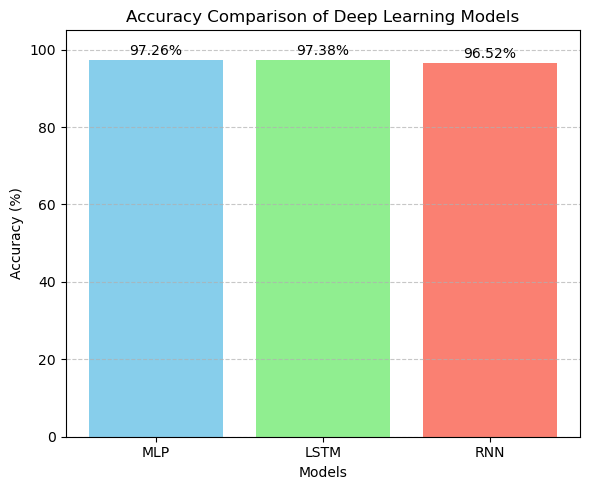

In [20]:
import matplotlib.pyplot as plt

# Example data
models = ["MLP", "LSTM", "RNN"]
accuracies = [97.26, 97.38, 96.52]  # Replace with your actual values

# Convert accuracies to percentages for plotting
# accuracies_percent = [acc * 100 for acc in accuracies]

# Plotting
plt.figure(figsize=(6, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

# Labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Deep Learning Models')
plt.ylim(0, 105)  # Give some space above bars
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
